####using pandas and numpy ,download the data from the kaggle regarding nasa and work on it


In [ ]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd

In [ ]:
from google.colab import files
uploaded = files.upload()


Saving nasa.csv to nasa.csv


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
warnings.filterwarnings(action='ignore',category=DeprecationWarning)
warnings.filterwarnings(action='ignore',category=FutureWarning)

df = pd.read_csv('nasa.csv')











In [ ]:
df.isnull().sum()

Neo Reference ID                0
Name                            0
Absolute Magnitude              0
Est Dia in KM(min)              0
Est Dia in KM(max)              0
Est Dia in M(min)               0
Est Dia in M(max)               0
Est Dia in Miles(min)           0
Est Dia in Miles(max)           0
Est Dia in Feet(min)            0
Est Dia in Feet(max)            0
Close Approach Date             0
Epoch Date Close Approach       0
Relative Velocity km per sec    0
Relative Velocity km per hr     0
Miles per hour                  0
Miss Dist.(Astronomical)        0
Miss Dist.(lunar)               0
Miss Dist.(kilometers)          0
Miss Dist.(miles)               0
Orbiting Body                   0
Orbit ID                        0
Orbit Determination Date        0
Orbit Uncertainity              0
Minimum Orbit Intersection      0
Jupiter Tisserand Invariant     0
Epoch Osculation                0
Eccentricity                    0
Semi Major Axis                 0
Inclination   

In [ ]:
df['Hazardous'].value_counts()

Hazardous
False    3932
True      755
Name: count, dtype: int64

In [ ]:
df['Hazardous'] = df['Hazardous'].map({True: 1, False: 0})

In [ ]:
df['Close Approach Date'].value_counts()
del df['Close Approach Date']

In [ ]:
df['Orbiting Body'].value_counts()
del df['Orbiting Body']

In [ ]:
del df['Orbit Determination Date']

In [ ]:
df['Equinox'].value_counts()
del df['Equinox']

<Axes: >

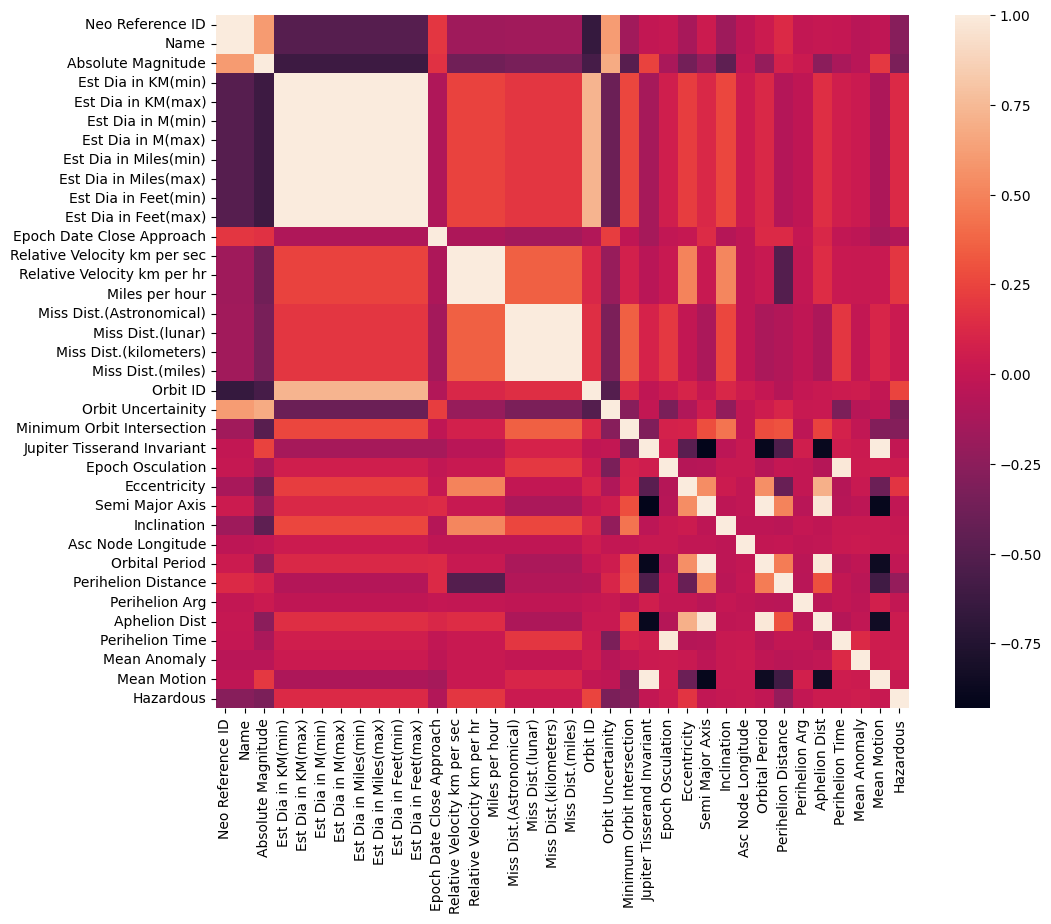

In [ ]:
corrmat = df.corr()
f, ax = plt.subplots(figsize = (12, 9))
sns.heatmap(corrmat, vmax = 1, square = True)

In [ ]:
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

In [ ]:
from sklearn.model_selection import train_test_split as tts
X_train, X_test, y_train, y_test = tts(X, y,test_size = 0.2 , random_state = 0)

In [ ]:
a = pd.DataFrame(y_test)
a[0].value_counts()
print("Baseline Accuracy for this Test Set = 84.54")


Baseline Accuracy for this Test Set = 84.54


In [ ]:
a = pd.DataFrame(y_train)
a[0].value_counts()
print('Baseline Accuracy for this Train Set = 83.72')
print()

Baseline Accuracy for this Train Set = 83.72



In [ ]:
def classifiers(clf, name):
    y_pred = clf.predict(X_test)
    y_pred_train = clf.predict(X_train)

    from sklearn.metrics import confusion_matrix
    cm_test = confusion_matrix(y_pred, y_test)
    cm_train = confusion_matrix(y_pred_train, y_train)

    print('Accuracy of {} for Test Set = {}'.format(name, (cm_test[1][1] + cm_test[0][0])/len(y_test)))
    print('Accuracy of {} for Train Set = {}'.format(name, (cm_train[1][1] + cm_train[0][0])/len(y_train)))
    print()

    return cm_train, cm_test

In [ ]:
from sklearn.naive_bayes import GaussianNB
clf = GaussianNB()
clf.fit(X_train, y_train)
cm_train, cm_test = classifiers(clf, 'Naive Bayes')

Accuracy of Naive Bayes for Test Set = 0.8454157782515992
Accuracy of Naive Bayes for Train Set = 0.8372899439850627



In [ ]:
from sklearn.svm import SVC
clf = SVC(kernel = 'rbf')
clf.fit(X_train, y_train)
cm_train, cm_test = classifiers(clf, 'SVC')


from sklearn.tree import DecisionTreeClassifier as DTC
clf = DTC()
clf.fit(X_train, y_train)
cm_train, cm_test = classifiers(clf, 'Decision Tree')

Accuracy of SVC for Test Set = 0.8454157782515992
Accuracy of SVC for Train Set = 0.8372899439850627

Accuracy of Decision Tree for Test Set = 0.9936034115138592
Accuracy of Decision Tree for Train Set = 1.0



In [ ]:
import lightgbm as lgb

d_train = lgb.Dataset(X_train, label = y_train)
params = {}
clf = lgb.train(params, d_train, 100)
y_pred = clf.predict(X_test)
y_pred_train = clf.predict(X_train)

for i in range(0, len(y_pred)):
    if y_pred[i] < 0.5:
        y_pred[i] = 0
    else:
        y_pred[i] = 1

for i in range(0, len(y_pred_train)):
    if y_pred_train[i] < 0.5:
        y_pred_train[i] = 0
    else:
        y_pred_train[i] = 1


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.028709 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 7684
[LightGBM] [Info] Number of data points in the train set: 3749, number of used features: 35
[LightGBM] [Info] Start training from score 0.162710
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: 

In [ ]:
from sklearn.metrics import confusion_matrix
cm_test = confusion_matrix(y_pred, y_test)
cm_train = confusion_matrix(y_pred_train, y_train)

print('Accuracy of {} for Test Set = {}'.format('LightGBM', (cm_test[1][1] + cm_test[0][0])/len(y_test)))
print('Accuracy of {} for Train Set = {}'.format('LightGBM', (cm_train[1][1] + cm_train[0][0])/len(y_train)))
print()

Accuracy of LightGBM for Test Set = 0.9914712153518124
Accuracy of LightGBM for Train Set = 1.0

